# Workflow

**1.** Get data ready <br>
**2.** Build a model <br>
**3.** Fit the model to the data <br>
**4.** Make predictions <br>
**5.** Validate the model <br>
**6.** Refine the model <br>
**7.** Save and reuse <br>

In [1]:
steps = {
    1: "Get data ready",
    2: "Build a model",
    3: "Fit the model to the data",
    4: "Make predictions",
    5: "Validate the model",
    6: "Refine the model",
    7: "Save and reuse"
}

##  Example: straight line

### 0: Setup

In [2]:
import torch as torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.2.2+cpu'

### 1: Get data ready

In [4]:
a = 0.5
b = 1

x = torch.arange(1,11,1).unsqueeze(dim=1)
y = a * x + b

In [5]:
print(x)

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])


In [6]:
print(y)

tensor([[1.5000],
        [2.0000],
        [2.5000],
        [3.0000],
        [3.5000],
        [4.0000],
        [4.5000],
        [5.0000],
        [5.5000],
        [6.0000]])


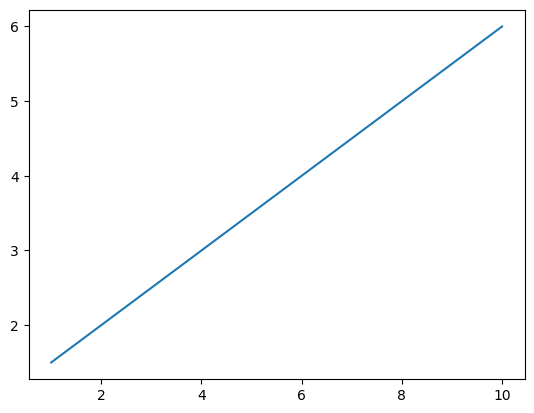

In [7]:
plt.plot(x,y)

In [8]:
ratio = 0.7
size = len(x)
point = int(size * ratio)

In [9]:
xt, yt = x[:point], y[:point]
print(xt, yt)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7]]) tensor([[1.5000],
        [2.0000],
        [2.5000],
        [3.0000],
        [3.5000],
        [4.0000],
        [4.5000]])


In [10]:
xv, yv = x[point:], y[point:]
print(xv, yv)

tensor([[ 8],
        [ 9],
        [10]]) tensor([[5.0000],
        [5.5000],
        [6.0000]])


In [11]:
def plot_truth(xt, yt, xv, yv) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.legend()
    
def plot_guess(xt, yt, xv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()
    
def plot_both(xt, yt, xv, yv, yp) :
    plt.scatter(xt, yt, color="blue", label="train")
    plt.scatter(xv, yv, color="lightblue", label="valid")
    plt.scatter(xv, yp, color="red", label="guess")
    plt.legend()

def plot_loss(epoch, loss) :
    plt.plot(epoch, loss)

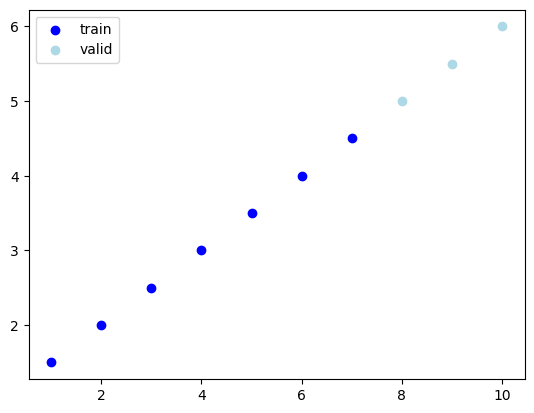

In [12]:
plot_truth(xt,yt,xv,yv)

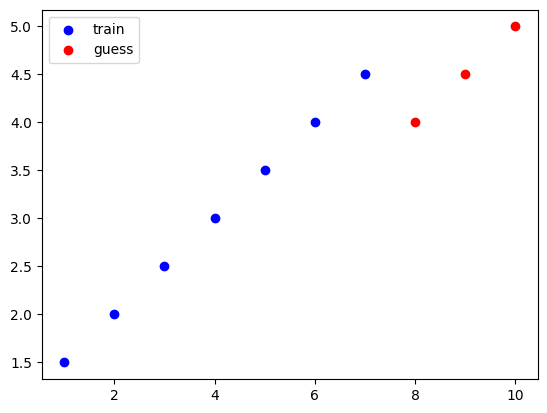

In [13]:
plot_guess(xt,yt,xv,[4,4.5,5])

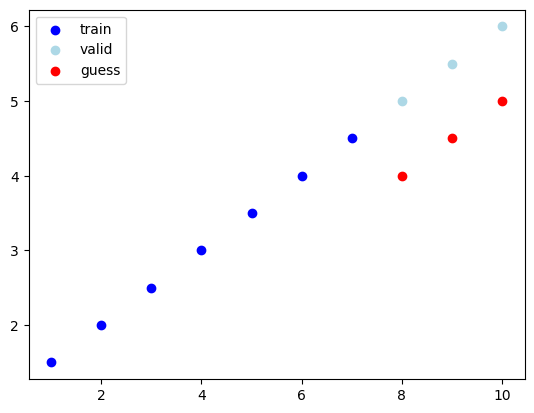

In [14]:
plot_both(xt,yt,xv,yv,[4,4.5,5])

### 2: Build a model

In [15]:
class LinearRegressionModule(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.weights * x + self.bias

In [16]:
torch.manual_seed(0)

model = LinearRegressionModule()

list(model.parameters())

[Parameter containing:
 tensor([1.5410], requires_grad=True),
 Parameter containing:
 tensor([-0.2934], requires_grad=True)]

In [17]:
print(model.state_dict())

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])


In [18]:
with torch.inference_mode():
    yp = model(xv)

In [19]:
print(f"Number of samples: {len(xt)}") 
print(f"Number of predictions: {len(yp)}")
print(f"Predicted values: {yp}")

Number of samples: 7
Number of predictions: 3
Predicted values: tensor([[12.0345],
        [13.5755],
        [15.1165]])


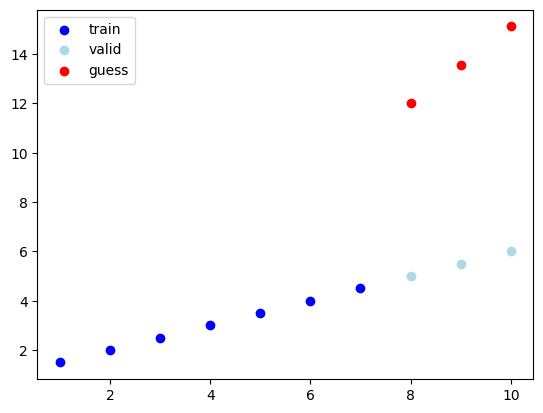

In [20]:
plot_both(xt,yt,xv,yv,yp)

In [21]:
loss_func = nn.L1Loss()
learn_func = torch.optim.SGD(params = model.parameters(), lr=0.01)

### 3: Fit the model to the data

In [22]:
learn_func.zero_grad()
model.train()
yp = model(xt)
loss = loss_func(yp, yt)
loss.backward()
learn_func.step()

### 4: Make predictions

In [23]:
model.eval()
with torch.inference_mode():
    yp = model(xv)

In [24]:
print(yp)

tensor([[11.7303],
        [13.2341],
        [14.7380]])


### 5: Validate the model

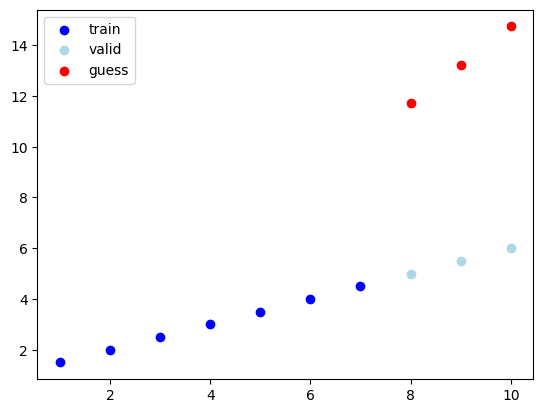

In [25]:
plot_both(xt,yt,xv,yv,yp)

### 6: Refine the model

In [26]:
epochs = []
losses = []

for epoch in range(250):
    learn_func.zero_grad()
    model.train()
    yp = model(xt)
    loss = loss_func(yp, yt)
    loss.backward()
    learn_func.step()

    model.eval()
    with torch.inference_mode():
        yp = model(xv)
        distance = loss_func(yp, yv)
        
        epochs.append(epoch)
        losses.append(distance)

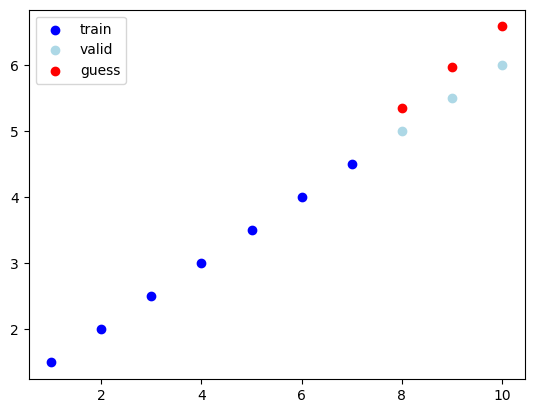

In [27]:
plot_both(xt,yt,xv,yv,yp)

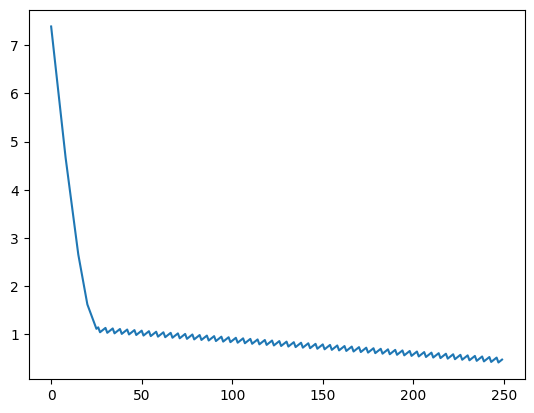

In [28]:
plot_loss(epochs, losses)